In [1]:
import tensorflow as tf
import matplotlib.pyplot as mplt
import numpy as np

1 1


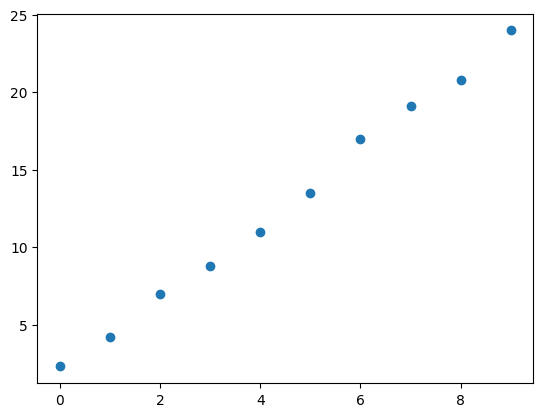

In [2]:
#Create festures
x = np.array(range(10))
y = np.array([2.3,4.2,7,8.8,11,13.5,17,19.1,20.8,24])
print(x.ndim, y.ndim)
mplt.scatter(x,y)

In [3]:
x = tf.constant(x)
y = tf.constant(y)
x,y

(<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>,
 <tf.Tensor: shape=(10,), dtype=float64, numpy=array([ 2.3,  4.2,  7. ,  8.8, 11. , 13.5, 17. , 19.1, 20.8, 24. ])>)

In [4]:
x = tf.reshape(x, shape=(-1,1))
y = tf.reshape(y, shape=(-1,1))#-1 means that this shape can change depending on the vector
# 1 represente le batch_size, par ailleurs, il s'agit aussi de la taille des elemnts que nous devrons entrer pour tester notre modele

#####The input tensor has shape (None,), which indicates a one-dimensional tensor with a variable length. However, the dense_3 layer expects a tensor with at least two dimensions, where the first dimension is the batch size and the second dimension is the number of features.

To resolve this issue, you can reshape the input tensor to have two dimensions, for example by using the tf.reshape() function. The shape of the reshaped tensor should be (None, 1) to indicate a batch of inputs, each with one feature.

####Creating a model

1. Creating a model - define the input and output layers, as welle as the hidden layers of a deep learning model
2. Compilling the model-define the loss function and the optimizers and the evaluation metrics.
3. Fitting a model-letting the model try to find patterns between X & y

In [5]:
tf.random.set_seed(42)

#create the model using the sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])#mae is for mean absolute error

#fit the model
model.fit(x,y, epochs=20)

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 18.7556 - mae: 18.7556
Epoch 2/20
1/1 [==============================] - 0s 14ms/step - loss: 18.5431 - mae: 18.5431
Epoch 3/20
1/1 [==============================] - 0s 18ms/step - loss: 18.3306 - mae: 18.3306
Epoch 4/20
1/1 [==============================] - 0s 11ms/step - loss: 18.1181 - mae: 18.1181
Epoch 5/20
1/1 [==============================] - 0s 10ms/step - loss: 17.9056 - mae: 17.9056
Epoch 6/20
1/1 [==============================] - 0s 12ms/step - loss: 17.6931 - mae: 17.6931
Epoch 7/20
1/1 [==============================] - 0s 13ms/step - loss: 17.4806 - mae: 17.4806
Epoch 8/20
1/1 [==============================] - 0s 12ms/step - loss: 17.2681 - mae: 17.2681
Epoch 9/20
1/1 [==============================] - 0s 13ms/step - loss: 17.0556 - mae: 17.0556
Epoch 10/20
1/1 [==============================] - 0s 19ms/step - loss: 16.8431 - mae: 16.8431
Epoch 11/20
1/1 [==============================] - 0s 15ms/st

###We try to make a prediction

In [6]:
a = np.array([15])
y_pred = model.predict(a)
y_pred

1/1 [==============================] - 0s 236ms/step


array([[-6.251936]], dtype=float32)

[array([[-0.43012905]], dtype=float32), array([0.20000003], dtype=float32)]
2 2


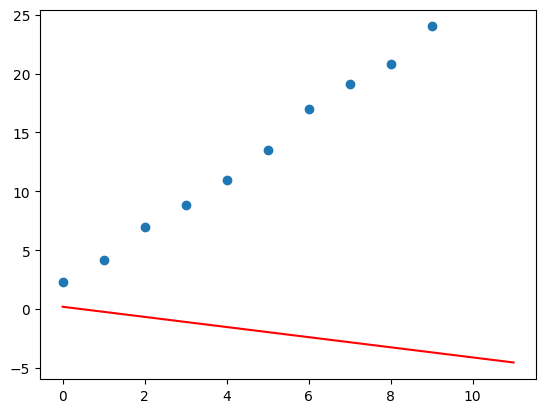

In [7]:
weights = model.get_weights()
print(weights)
abs = np.array(range(12))
ser = weights[0][0][0]*abs + weights[1][0]
x1 = np.array(range(10))
y1 = np.array([2.3,4.2,7,8.8,11,13.5,17,19.1,20.8,24])
print(x.ndim, y.ndim)
mplt.scatter(x1,y1)
mplt.plot(abs, ser, c="red")


##Improving the model:
1. **Creating a model**
add more layers, increase the number of hidden units(also called neurons) within each layers, change the activation function of each layers
2. **Compiling a model**
Change the optimisation function, the learning rate of the optimisation function
3. **Fitting a model**
let the model see the data more time or give more data

First we improve the number of Epochs

In [8]:
tf.random.set_seed(42)

#create the model using the sequential API
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])

#compile the model
model2.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])#mae is for mean absolute error

#fit the model
model2.fit(x,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 810ms/step - loss: 12.3330 - mae: 12.3330
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12.1205 - mae: 12.1205
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 11.9080 - mae: 11.9080
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 11.6955 - mae: 11.6955
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 11.4830 - mae: 11.4830
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 11.2705 - mae: 11.2705
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 11.0580 - mae: 11.0580
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 10.8455 - mae: 10.8455
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 10.6330 - mae: 10.6330
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 10.4205 - mae: 10.4205
Epoch 11/100
1/1 [==============================

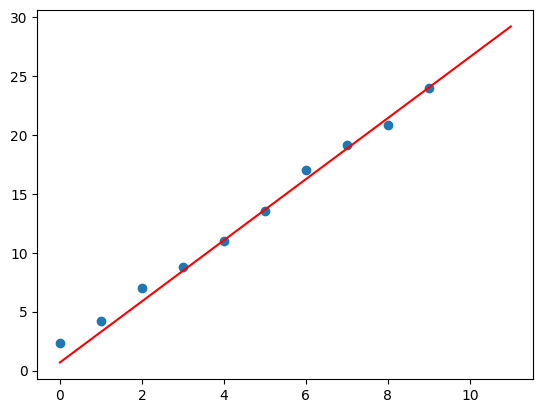

In [9]:
weights = model2.get_weights()
abs = np.array(range(12))
ser = weights[0][0][0]*abs + weights[1][0]
x1 = np.array(range(10))
y1 = np.array([2.3,4.2,7,8.8,11,13.5,17,19.1,20.8,24])
mplt.scatter(x1,y1)
mplt.plot(abs, ser, c="red")

We change the activation function of the model

In [10]:
tf.random.set_seed(42)

#create the model using the sequential API
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
    ])

#compile the model
model3.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])#mae is for mean absolute error

#fit the model
model3.fit(x,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.6186 - mae: 12.6186
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 12.2327 - mae: 12.2327
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 11.8619 - mae: 11.8619
Epoch 4/100
1/1 [==============================] - 0s 40ms/step - loss: 11.4882 - mae: 11.4882
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 11.0963 - mae: 11.0963
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 10.6322 - mae: 10.6322
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 10.0816 - mae: 10.0816
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 9.4003 - mae: 9.4003
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 8.5492 - mae: 8.5492
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 7.4619 - mae: 7.4619
Epoch 11/100
1/1 [==============================] - 0s 13

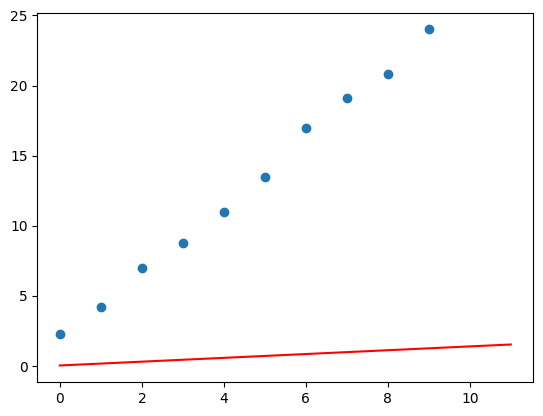

In [11]:
weights = model3.get_weights()
abs = np.array(range(12))
ser = weights[0][0][0]*abs + weights[1][0]
x1 = np.array(range(10))
y1 = np.array([2.3,4.2,7,8.8,11,13.5,17,19.1,20.8,24])
mplt.scatter(x1,y1)
mplt.plot(abs, ser, c="red")

We will now change the optimizer

In [12]:
tf.random.set_seed(42)

#create the model using the sequential API
model4 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#compile the model
model4.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ["mae"])#mae is for mean absolute error

#fit the model
model4.fit(x,y, epochs=20)

Epoch 1/20
1/1 [==============================] - 1s 735ms/step - loss: 10.3557 - mae: 10.3557
Epoch 2/20
1/1 [==============================] - 0s 11ms/step - loss: 10.3502 - mae: 10.3502
Epoch 3/20
1/1 [==============================] - 0s 10ms/step - loss: 10.3447 - mae: 10.3447
Epoch 4/20
1/1 [==============================] - 0s 11ms/step - loss: 10.3392 - mae: 10.3392
Epoch 5/20
1/1 [==============================] - 0s 11ms/step - loss: 10.3337 - mae: 10.3337
Epoch 6/20
1/1 [==============================] - 0s 11ms/step - loss: 10.3282 - mae: 10.3282
Epoch 7/20
1/1 [==============================] - 0s 10ms/step - loss: 10.3227 - mae: 10.3227
Epoch 8/20
1/1 [==============================] - 0s 19ms/step - loss: 10.3172 - mae: 10.3172
Epoch 9/20
1/1 [==============================] - 0s 14ms/step - loss: 10.3117 - mae: 10.3117
Epoch 10/20
1/1 [==============================] - 0s 11ms/step - loss: 10.3062 - mae: 10.3062
Epoch 11/20
1/1 [==============================] - 0s 12ms

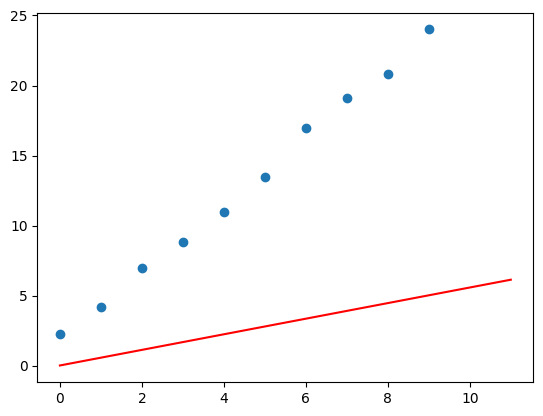

In [13]:
weights = model4.get_weights()
abs = np.array(range(12))
ser = weights[0][0][0]*abs + weights[1][0]
x1 = np.array(range(10))
y1 = np.array([2.3,4.2,7,8.8,11,13.5,17,19.1,20.8,24])
mplt.scatter(x1,y1)
mplt.plot(abs, ser, c="red")

In [14]:
#1. create a model(specify to the problem)
b_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
    ])

#Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.001),
              metrics=["mae"])

#Fit the model


Don't forget to check MIT course on deep learning

In [15]:
from tensorflow.keras.utils import plot_model

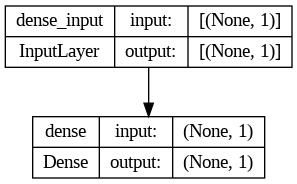

In [16]:
plot_model(model, show_shapes=True)

####Evaluating our model using metrics


In [17]:
tf.random.set_seed(36)
x_train = tf.random.uniform([250],0,20)
y_train = 2*x_train -3.5 + tf.random.uniform([250], -5, 5)
x_train = tf.reshape(x_train,[-1,1])
y_train = tf.reshape(y_train,[-1,1])
x_test = tf.random.uniform([50],17,25)
y_test = 2*x_test -3.5 + tf.random.uniform([50], -5, 5)
x_test = tf.reshape(x_test,[-1,1])
y_test = tf.reshape(y_test,[-1,1])
print(x_train.shape,y_train.shape)

(250, 1) (250, 1)


In [18]:
tf.random.set_seed(32)

#1. create a model(specify to the problem)
b_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
    ])

#Compile the model
b_model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

#Fit the model
b_model.fit(x_train,y_train,epochs=100)


Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 18.9923 - mae: 18.9923
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 16.3985 - mae: 16.3985
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 13.8191 - mae: 13.8191
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 11.0013 - mae: 11.0013
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 8.0473 - mae: 8.0473
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 4.8637 - mae: 4.8637
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 3.1633 - mae: 3.1633
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 3.3393 - mae: 3.3393
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 3.0813 - mae: 3.0813
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 3.0942 - mae: 3.0942
Epoch 11/100
8/8 [==============================] - 0s 5ms/step - loss:

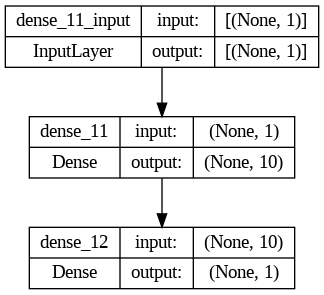

In [19]:
plot_model(b_model, show_shapes=True)

In [20]:
weight = b_model.get_weights()
weight

[array([[ 0.9241901 , -0.06025768, -0.06841548, -0.61752146,  0.9021867 ,
         -0.6530427 , -0.14112252, -0.09772402, -0.07758384,  1.2419424 ]],
       dtype=float32),
 array([-1.2412694 , -0.35701284, -0.3388221 ,  0.        , -1.5717266 ,
         0.        ,  0.        ,  0.        , -0.11967196, -1.1216195 ],
       dtype=float32),
 array([[ 0.70827985],
        [-0.15965936],
        [-0.21318565],
        [ 0.5702643 ],
        [ 0.5899108 ],
        [ 0.30699545],
        [ 0.6266621 ],
        [ 0.2587782 ],
        [-0.6204232 ],
        [ 0.724082  ]], dtype=float32),
 array([-1.044449], dtype=float32)]

In [21]:
b_model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 2.8846 - mae: 2.8846


[2.884561061859131, 2.884561061859131]

2/2 [==============================] - 0s 5ms/step


[]

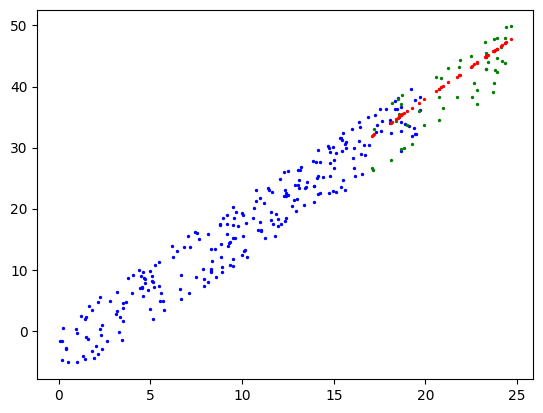

In [22]:
y_pred = b_model.predict(x_test)
mplt.scatter(x_train, y_train, c="blue", s=2)
mplt.scatter(x_test, y_test, c="green", s=2)
mplt.scatter(x_test, y_pred, c="red", s=2)
mplt.plot()

In [23]:
b_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                20        
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


##Saving our model

#####Saving our model allows us to use them outside of Google collabs.
#####There are two mains formats: The fdf5 and the Savemodel format 

In [ ]:
b_model